# Projeto 1 - Base de Dados Covid

O objetivo do projeto será desenvolver um estudo no dataset `COVID.csv`, base esta que contém informações sobre casos de COVID. Ou seja a partir do diagnóstico de sintomas e informações dos pacientes deve-se desenvolver um modelo para prever casos confirmados de COVID.

<br>

A descrição das variáveis contidas no dataset pode ser encontradas a seguir:

 - **id**: Identificação do paciente<br>
 - **sex**: Sexo do Paciente (0 - Homem / 1 - Mulher) <br>
 - **patient_type**: Se o paciente foi dispensado para casa (1) ou se foi internado (0) <br>
 - **intubed**: Seo paciente foi intubado ou não<br>
 - **pneumonia**: Se o paciente apresentou pneumonia ou não<br>
 - **age**: Idade do Paciente<br>
 - **pregnancy**: Se a paciente estava grávida ou não (para pacientes mulheres)<br>
 - **diabetes**: Se o paciente tem diabetes ou não<br>
 - **copd**: Se opaciente tem COPD ou não<br>
 - **asthma**: Se o paciente tem Asma ou não<br>
 - **inmsupr**: Se o paciente apresentou Imunosupressão ou não<br>
 - **hypertension**: Se o paciente tem hipertensão ou não<br>
 - **ohter_disease**: Se o paciente tem outras doenças ou não<br>
 - **cardiovascular**: Se o paciente tem doenças cardiácas ou não<br>
 - **obesity**: Se o paciente tem obesidade ou não<br>
 - **renal_chronic**: Se o paciente tem problemas renais ou não<br>
 - **tobacco**: Se o paciente é fumante ou não<br>
 - **contact_other_covid**: Se o paciente teve contato com outras pessoas diagnosticadas com covid<br>
 - **icu**: Se o paciente precisou ser internado na UTI<br>
 - **covid_res**: Se o resultado do teste foi Positivo ou Negativo<br>
 
PAra ajudar no desenvolvimento do projeto, vamos separar o projeto em algumas seções, conforme descritas a seguir:

- __Preparação dos Dados e Verificação de Consistência__: Neste tópico deve ser feita a verificação da consistência dos dados e caso necessário efetuar eventuais modificações na base de dados. Alguns dos procedimentos que podemos fazer aqui são: Remoção e/ou tratamento de valores faltantes, remoção de duplicatas, ajustes dos tipos de variáveis, análise de _outliers_ entre outras;

<br>

- __Análise Exploratória dos Dados__: Para fazermos a modelagem, precisamos conhecer muito bem os dados que estamos trabalhando. Por isso, nesta parte do projeto vocês desenvolveram an´laises e gráficos a respeito dos dados que estão utilizando. Tente tirar ao máximo informaç~eos sobre as variáveis em si e suas relações com as demais;

<br>

- __Modelagem dos Dados__: Nesta parte, vamos modelar um classificador para os resultados dos exames de COVID (`covid_res`). VocÊs deveram __treinar pelo menos 3 modelos__ (podendo testar mais que 3 também) e de acordo com alguma métrica de avaliação (escolhida por vocÊs), decidir qual será o melhor modelo a ser utilizado!;

<br>

- __Otimização do Modelo__: A partir do modelo escolhido no tópico anterior, vamos tentar aprimorar e garantir um melhor desempenho no modelo, seja fazendo validação cruzada, otimização de parâmetros com _GridSearchCV_ ou _RandomizedSearchCV_ e até mesmo testar diferentes _thresholds_ (ao invés de utilizar a função _predict_ do modelo, utilize a função _predict_proba_ do modelo e a partir das probabilidades determinar qual vai ser o limiar onde será considerado um caso positivo ou negativo);

<br>

- __Conclusões sobre o Projeto__: Para finalizar, descreva as suas conclusões sobre o desenvolvimento do modelo e os resultados obtidos.

## Critérios de Avaliação

Um processo de análise e modelagem de dados depende de diversos fatores, desde quais sementes aleatórias foram definadas até mesmo o desempenho computacional da máquina utlizada. Dessa forma, __não__ será cobrado que resultados os alunos obteram, mas sim o desenvolvimento do projeto, olhando os seguinte tópicos:

- Desenvolvimento mínimo de cada um dos itens acima;

- Padrozinação de Gráficos, Visualizações e códigos;

- _Clean COde_ e códigos comentados;

- Explicação de todos os processos feitos e decisões tomadas


<br>


## Informações Gerais sobre o Projeto

- O projeto poderá ser desenvolvido __individualmente__ ou em __grupos com até 4 pessoas__, caos façam em grupos enviar a relação de alunos do grupo para o professor;

- Data de Divulgação do Projeto: 29/11/2021;

- Monitoria do Projeto 1: 10/12/2021;

- Data de Entrega: 17/12/2021;

- Entrega: Através do _Class_, será criado um Projeto para a entrega dentro do módulo "_Machine Learning_", Aula "Árvore de Decisão" na aba Exercícios;

<br>

__Padrão de Entrega__ Para a identificação dos alunos que entregaram o projeto, peço para que sigam o padrão de nome para o arquivo enviado conforme as orientações abaixo:

- Para quem realizar __individualmente__: NúmeroDaTurma_Projeto1_NomeDoALuno.ipynb;

- Para quem realizar em __grupos__: NúmeroDaTurma_Projeto1_GrupoX.ipynb;

__Bem Importante:__ Deixem devidamente identificado o número da turma, número do grupo e o nome do aluno ou alunos dentro do Notebook também.

# Projeto 1 - Base de Dados Covid

#### 780_Projeto1_JohnnyHorita.ipynb

## Preparação dos Dados e Verificação de Consistência

Neste tópico deve ser feita a verificação da consistência dos dados e caso necessário efetuar eventuais modificações na base de dados. Alguns dos procedimentos que podemos fazer aqui são: Remoção e/ou tratamento de valores faltantes, remoção de duplicatas, ajustes dos tipos de variáveis, análise de outliers entre outras;

### Importando bibliotecas

In [1]:
# Bibliotecas
import pandas as pd
import numpy as np
import datetime
import requests
import warnings
from collections import Counter
from pprint import pprint

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import squarify
import plotly.offline as py
#import plotly_express as px

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from mlxtend.plotting import plot_confusion_matrix

from sklearn import metrics
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, precision_score, recall_score, f1_score, r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, cross_val_score, StratifiedKFold

# Logistic Regression
from sklearn.linear_model import LogisticRegression 
# Support Vector Machine
from sklearn.svm import SVC 
# Naive Bayes (Gaussian, Multinomial)
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
# Stochastic Gradient Descent Classifier
from sklearn.linear_model import SGDClassifier
# KNN (k-nearest neighbor)
from sklearn.neighbors import KNeighborsClassifier
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
# Random Forest
from sklearn.ensemble import RandomForestClassifier
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
# XGBoost Classifier
from xgboost import XGBClassifier
# LGBM Classifier
from lightgbm import LGBMClassifier
# Ada Boosting Classifier
from sklearn.ensemble import AdaBoostClassifier
# Dummy Boosting Classifier
from sklearn.dummy import DummyClassifier

import shap

import imblearn
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE


from IPython.core.display import HTML as Center
from IPython.display import Image
warnings.filterwarnings('ignore')
%matplotlib inline

### Padrões


In [2]:
sns.set_style('darkgrid') # darkgrid, white grid, dark, white and ticks
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)    # fontsize of the tick labels
plt.rc('legend', fontsize=13)    # legend fontsize
plt.rc('font', size=13)          # controls default text sizes
colors = sns.color_palette('pastel')

#sns.color_palette('deep') # deep, pastel, Set1 Set2 Set3

In [3]:
Center(""" <style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style> """)

### Funções


In [4]:
# Função de avaliação dos valores de NaN no dataframe

def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Valores faltantes', 1 : '% de Valores Totais'})
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% de Valores Totais', ascending=False).round(1)
        print ("O dataframe tem " + str(df.shape[1]) + " colunas e " + str(df.shape[0]) + " linhas.\n"      
            "Existem " + str(mz_table.shape[0]) +
              " colunas que têm valores faltantes.")
        mz_table.to_excel('missing_and_zero_values.xlsx', freeze_panes=(1,0), index = True)
        return mz_table


In [5]:
# Função de avaliação de modelos de aprendizagem de máquinas

def test_models_plot_roc_auc_curve(model_list, col_model_name, col_model, X_train, X_test, y_train, y_test):
    plt.figure(figsize=(15,7))
    for mdl in model_list:
        model = mdl[col_model]
        model.fit(X_train, y_train)
        y_predict = model.predict(X_test)
        
        fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
        auc = metrics.roc_auc_score(y_test, y_predict)
        plt.plot(fpr, tpr, label='%s (ROC-AUC = %0.4f)' % (mdl[col_model_name], auc))
        print("Model      : %s" % mdl[col_model_name])
        calc_predict(mdl[col_model_name], y_test, y_predict)
        
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC-AUC curve')
    plt.legend(loc="lower right")
    plt.show()

In [6]:
# Função de avaliação de modelos apresentação da matriz de confusão

def test_models_plot_confusion_matrix(model_list, col_model_name, col_model, X_train, X_test, y_train, y_test):

    for mdl in model_list:
        model = mdl[col_model]
        model.fit(X_train, y_train)
        y_predict = model.predict(X_test)
        print("Model      : %s" % mdl[col_model_name])
        calc_predict(mdl[col_model_name], y_test, y_predict)
        
        cm = confusion_matrix(y_test, y_predict)
        plot_confusion_matrix(conf_mat=cm)
        plt.show()
        print("=" * 55)
        print("")


In [7]:
# Função para cálcular as métricas 

def calc_predict(col_model_name, y_test, y_predict):
    print("ROC - AUC  : %0.4f " % metrics.roc_auc_score(y_test, y_predict))
    print("Accuracy   : %0.4f " %  accuracy_score(y_test, y_predict))
    print("Precision  : %0.4f " % precision_score(y_test, y_predict, average='weighted'))
    print("Recall     : %0.4f " % recall_score(y_test, y_predict, average='weighted'))
    print("F1 - Score : %0.4f " % f1_score(y_test, y_predict, average='weighted'))
    print("MAE        : %0.4f " % mean_absolute_error(y_test, y_predict))
    print("RMSE       : %0.4f " % np.sqrt(mean_squared_error(y_test, y_predict)))
    print("R2         : %0.4f " % r2_score(y_test, y_predict))
    print("")
    print(classification_report(y_test, y_predict))
    print("=" * 55)
    print("")


In [8]:

roc=[]
acc=[]
pre=[]
rec=[]
f1s=[]
mae=[]
rms=[]
r2s=[]

def x_calc_predict(col_model_name, y_test, y_predict):
    print("Accuracy   : %0.4f " % accuracy_score(y_test, y_predict))
    print("Precision  : %0.4f " % precision_score(y_test, y_predict, average='weighted'))
    print("Recall     : %0.4f " % recall_score(y_test, y_predict, average='weighted'))
    print("F1 - Score : %0.4f " % f1_score(y_test, y_predict, average='weighted'))
    print("MAE        : %0.4f " % mean_absolute_error(y_test, y_predict))
    print("RMSE       : %0.4f " % np.sqrt(mean_squared_error(y_test, y_predict)))
    print("R2         : %0.4f " % r2_score(y_test, y_predict))
    print("")
    print(classification_report(y_test, y_predict))
    print("=" * 55)
    print("")

#acc.sort(key = lambda el:el[1],reverse =True)
#acc.append(['KNNR',r2_score(y_test,model.predict(X_test))])

### Inicializando Dataframe


In [9]:
# Importando arquivo

df = pd.read_csv('./COVID.csv')


In [10]:
# Quantidade de linhas e colunas

qtl, qtc = df.shape

# Quantidade de linhas duplicadas

qtd, _ = df[df.duplicated(keep=False)].shape

print(f'Quantidade de linhas...........: {qtl}')
print(f'Quantidade de linhas duplicadas: {qtd}')
print(f'Quantidade de colunas..........: {qtc}')


Quantidade de linhas...........: 499692
Quantidade de linhas duplicadas: 0
Quantidade de colunas..........: 20


In [11]:
# Informações do dataframe

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499692 entries, 0 to 499691
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Unnamed: 0           499692 non-null  int64  
 1   sex                  499692 non-null  int64  
 2   patient_type         499692 non-null  int64  
 3   intubed              107424 non-null  float64
 4   pneumonia            499681 non-null  float64
 5   age                  499692 non-null  int64  
 6   pregnancy            245258 non-null  float64
 7   diabetes             498051 non-null  float64
 8   copd                 498246 non-null  float64
 9   asthma               498250 non-null  float64
 10  inmsupr              498030 non-null  float64
 11  hypertension         498203 non-null  float64
 12  other_disease        497499 non-null  float64
 13  cardiovascular       498183 non-null  float64
 14  obesity              498222 non-null  float64
 15  renal_chronic    


---

**Conclusões:** 

O dataframe é composto por 20 colunas e 499.692 registros.

Na tabela acima são apresentados valores não preenchidos para algumas colunas que serão demonstrados ao longo do projeto.



In [12]:
# Lista de colunas do dataframe

df.columns


Index(['Unnamed: 0', 'sex', 'patient_type', 'intubed', 'pneumonia', 'age',
       'pregnancy', 'diabetes', 'copd', 'asthma', 'inmsupr', 'hypertension',
       'other_disease', 'cardiovascular', 'obesity', 'renal_chronic',
       'tobacco', 'contact_other_covid', 'covid_res', 'icu'],
      dtype='object')

In [13]:
# Listagem das primeiras linhas do dataframe

df.head()


,Unnamed: 0,sex,patient_type,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,0,0,1,NaN,0.0,27,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,NaN
1,1,0,1,NaN,0.0,24,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1,NaN
2,2,1,0,0.0,0.0,54,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN,1,0.0
3,3,0,0,0.0,1.0,30,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1,0.0
4,4,1,0,0.0,0.0,60,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,NaN,1,0.0


In [14]:
# Avaliando os valores nulos do dataframe

missing_values_table(df)


O dataframe tem 20 colunas e 499692 linhas.
Existem 15 colunas que têm valores faltantes.


,Valores faltantes,% de Valores Totais,Data Type
icu,392269,78.5,float64
intubed,392268,78.5,float64
pregnancy,254434,50.9,float64
contact_other_covid,153675,30.8,float64
other_disease,2193,0.4,float64
inmsupr,1662,0.3,float64
diabetes,1641,0.3,float64
tobacco,1579,0.3,float64
cardiovascular,1509,0.3,float64
hypertension,1489,0.3,float64



---

**Conclusões:** 

A tabela acima calcula o percentual de valores faltantes (não preenchidos - NaN) por coluna/variável.

Identificamos que as variáveis abaixo tem o maior percentual de valores faltantes:

- **icu**: Se o paciente precisou ser internado na UTI;
- **intubed**: Se o paciente foi intubado ou não;
- **pregnancy**: Se a paciente estava grávida ou não (para pacientes mulheres);
- **contact_other_covid**: Se o paciente teve contato com outras pessoas diagnosticadas com covid;



---

**Tratamento de variáveis**

- Criação de uma nova variável **pregnancy_new**, onde os valores nulos (NaN) de pregnancy foram atualizados para 0, quando a variável sex for igual a 0 (Sexo do Paciente 0 - Homem / 1 - Mulher)<br>
    **obs:** Esta variável não apresenta correspondencia para a avaliação do paciente apresentar COVID<br>


- Exclusão de variáveis que entendemos não ser relevante para diagnosticar o paciente ser positivo ou não para COVID<br>
    **Unnamed: 0**: Indice "auxiliar" do dataframe<br>
    **icu**: Se o paciente precisou ser internado na UTI (Tem grande percentual de valores faltantes)<br>
    **intubed**: Se o paciente foi intubado ou não (Tem grande percentual de valores faltantes)<br>


- Exclusão de variáveis tratadas<br>
    **pregnancy**: Se a paciente estava grávida ou não (para pacientes mulheres)<br>


In [15]:
# pregnancy_new

# Criação de uma nova variável pregnancy_new, 
# onde os valores nulos (NaN) de pregnancy foram atualizados para 0, 
# quando a variável sex for igual a 0 (Sexo do Paciente 0 - Homem / 1 - Mulher)

# porém esta variável não apresenta correspondencia para a avaliação do paciente apresentar COVID
    
# Criando variável pregnancy_new
df['pregnancy_new'] = np.where(df['sex'] == 0, 0, df['pregnancy'])

print (f'pregnancy_new - Percentual de valores NaN: {100 * df["pregnancy_new"].isnull().sum() / len(df):.2f}%')


pregnancy_new - Percentual de valores NaN: 0.27%


In [16]:
# Exclusão de variáveis que entendemos não ser relevante para o modelo

# Unnamed: 0: ;
# icu: Se o paciente precisou ser internado na UTI;
# intubed: Se o paciente foi intubado ou não;
# pregnancy: Se a paciente estava grávida ou não (para pacientes mulheres);

# Deleting columns
DeleteList=['Unnamed: 0', 'pregnancy', 'icu', 'intubed']

# Novo dataframe 
dfc = df.drop(DeleteList, axis=1).copy()


In [17]:
# Para melhorar o dataframe optamos em retirar todos os pacientes que estivesse com alguma variável Nula, 
# pois a perda de dados foi mínima baseada no cálculo de valores faltantes 

dfc.dropna(inplace=True)

# Reindexando os indices do dataframe
dfc.reset_index(drop=True, inplace=True)

In [18]:
# Avaliando os valores nulos do dataframe tratrado

missing_values_table(dfc)


O dataframe tem 17 colunas e 342695 linhas.
Existem 0 colunas que têm valores faltantes.


,Valores faltantes,% de Valores Totais,Data Type


In [19]:
# Informações do dataframe

dfc.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342695 entries, 0 to 342694
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   sex                  342695 non-null  int64  
 1   patient_type         342695 non-null  int64  
 2   pneumonia            342695 non-null  float64
 3   age                  342695 non-null  int64  
 4   diabetes             342695 non-null  float64
 5   copd                 342695 non-null  float64
 6   asthma               342695 non-null  float64
 7   inmsupr              342695 non-null  float64
 8   hypertension         342695 non-null  float64
 9   other_disease        342695 non-null  float64
 10  cardiovascular       342695 non-null  float64
 11  obesity              342695 non-null  float64
 12  renal_chronic        342695 non-null  float64
 13  tobacco              342695 non-null  float64
 14  contact_other_covid  342695 non-null  float64
 15  covid_res        

In [20]:
# Analisando os valores das variáveis do datraframe 

for col in dfc.columns:
    print(f'{col} : {dfc[col].unique()}')
    

sex : [0 1]
patient_type : [1 0]
pneumonia : [0. 1.]
age : [ 27  56  34  49  54  25  61  40  52  53  57  51  45  67  78  79  59  44
  31  33  58  48  29  35  38  36  80  71  39  26  46  55  32  76  66  24
  43  63  17  37  42  60  65  30  50  73  41  47  20  23  28  84  69  62
  68  64  92  72  90  70   7  19  82   0  22  21  74   4  83  87  81  18
   9   8  93  15  14  11   1  88  13  75  95  77  16  85  91  89  86  10
  12   3   5   6   2  98  97  96  94 100 119 101  99 103 114 106 102 116
 120 104 118 109 110 117 115 113 108 107 111]
diabetes : [0. 1.]
copd : [0. 1.]
asthma : [0. 1.]
inmsupr : [0. 1.]
hypertension : [0. 1.]
other_disease : [0. 1.]
cardiovascular : [0. 1.]
obesity : [0. 1.]
renal_chronic : [0. 1.]
tobacco : [0. 1.]
contact_other_covid : [0. 1.]
covid_res : [1 0]
pregnancy_new : [0. 1.]


---

**Conclusões:** 

Analisando os valores contidos nas variáveis identificamos que os valores podem ter apenas 2 valores, sendo 1 ou 0, com exceção da variável **age** que representa a idade dos pacientes.


In [21]:
# Alterando o tipo de dado de todas as colunas para int para diminuir o tamanho do dataframe

dfc = dfc.astype(int, errors='ignore').copy()


---

**Conclusões:** 

Optamos em padronizar o tipo de dados para inteiro (int32) diminuindo o tamanho da memória utilizada pelo dataframe.

dfc (antes)
memory usage: 44.4 MB

dfc (depois)
memory usage: 22.2 MB


In [22]:
# Informações do dataframe

dfc.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342695 entries, 0 to 342694
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype
---  ------               --------------   -----
 0   sex                  342695 non-null  int32
 1   patient_type         342695 non-null  int32
 2   pneumonia            342695 non-null  int32
 3   age                  342695 non-null  int32
 4   diabetes             342695 non-null  int32
 5   copd                 342695 non-null  int32
 6   asthma               342695 non-null  int32
 7   inmsupr              342695 non-null  int32
 8   hypertension         342695 non-null  int32
 9   other_disease        342695 non-null  int32
 10  cardiovascular       342695 non-null  int32
 11  obesity              342695 non-null  int32
 12  renal_chronic        342695 non-null  int32
 13  tobacco              342695 non-null  int32
 14  contact_other_covid  342695 non-null  int32
 15  covid_res            342695 non-null  int32
 16  pr

In [23]:
# Quantidade de linhas e colunas
qtlc, qtcc = dfc.shape

print('Dataframe original - df')
print(f'Quantidade de linhas...........: {qtl}')
print(f'Quantidade de colunas..........: {qtc}')

print('\nDataframe tratado - dfc')
print(f'Quantidade de linhas...........: {qtlc}')
print(f'Quantidade de colunas..........: {qtcc}')

print (f'\nPercentual de registros retirados: {(100  * (qtl-qtlc) / qtl):.2f}%')

Dataframe original - df
Quantidade de linhas...........: 499692
Quantidade de colunas..........: 20

Dataframe tratado - dfc
Quantidade de linhas...........: 342695
Quantidade de colunas..........: 17

Percentual de registros retirados: 31.42%


In [36]:
dfc[dfc.duplicated(keep=False)].shape

(321142, 17)

---

**Conclusões:** 

Tratamos a variável **pregnancy** para criar a nova variável **pregnancy_new**, onde os valores nulos (NaN) de pregnancy foram atualizados para 0 quando a variável **sex** for igual a 0 (homem).


Criamos um novo dataframe **dfc**, retirando as variáveis **Unnamed: 0, pregnancy, icu, intubed**, pois entendemos que essas não são relevantes para a detecção do COVID e também por apresentar altos valores não preenchidos no caso das variáveis icu, intubed.


Retiramos todos os registros que estivessem com alguma variável não preenchida (NaN) para manter o máximo de informações no dataframe.


Com esses tratamentos acreditamos que o novo dataframe esta melhor preparado para análise exploratória de dados e modelagem.


### Inicializando Dataframe - Estudo 2



In [24]:
## Exclusão de variáveis que entendemos não ser relevante para o modelo

## Unnamed: 0: ;
## pregnancy: Se a paciente estava grávida ou não (para pacientes mulheres);

## Deleting columns
#DeleteList=['Unnamed: 0', 'pregnancy']

## Novo dataframe 
#dfc = df.drop(DeleteList, axis=1).copy()

#dfc.dropna(inplace=True)

## Reindexando os indices do dataframe
#dfc.reset_index(drop=True, inplace=True)

## Avaliando os valores nulos do dataframe tratrado

#missing_values_table(dfc)

## Informações do dataframe

##dfc.info()

## Alterando o tipo de dado de todas as colunas para int para diminuir o tamanho do dataframe

#dfc = dfc.astype(int, errors='ignore').copy()

## Informações do dataframe

#dfc.info()

## Quantidade de linhas e colunas
#qtlc, qtcc = dfc.shape

#print('Dataframe original - df')
#print(f'Quantidade de linhas...........: {qtl}')
#print(f'Quantidade de colunas..........: {qtc}')

#print('\nDataframe tratado - dfc')
#print(f'Quantidade de linhas...........: {qtlc}')
#print(f'Quantidade de colunas..........: {qtcc}')

#print (f'\nPercentual de registros retirados: {(100  * (qtl-qtlc) / qtl):.2f}%')

## Análise Exploratória dos Dados

Para fazermos a modelagem, precisamos conhecer muito bem os dados que estamos trabalhando. Por isso, nesta parte do projeto vocês desenvolveram análises e gráficos a respeito dos dados que estão utilizando. Tente tirar ao máximo informaçõeos sobre as variáveis em si e suas relações com as demais;

In [25]:
# Informações do dataframe

dfc.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342695 entries, 0 to 342694
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype
---  ------               --------------   -----
 0   sex                  342695 non-null  int32
 1   patient_type         342695 non-null  int32
 2   pneumonia            342695 non-null  int32
 3   age                  342695 non-null  int32
 4   diabetes             342695 non-null  int32
 5   copd                 342695 non-null  int32
 6   asthma               342695 non-null  int32
 7   inmsupr              342695 non-null  int32
 8   hypertension         342695 non-null  int32
 9   other_disease        342695 non-null  int32
 10  cardiovascular       342695 non-null  int32
 11  obesity              342695 non-null  int32
 12  renal_chronic        342695 non-null  int32
 13  tobacco              342695 non-null  int32
 14  contact_other_covid  342695 non-null  int32
 15  covid_res            342695 non-null  int32
 16  pr

In [26]:
# Listagem das primeiras linhas do dataframe

dfc.head()


,sex,patient_type,pneumonia,age,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,pregnancy_new
0,0,1,0,27,0,0,0,0,0,0,0,0,0,0,0,1,0
1,1,1,0,56,0,0,0,0,1,0,0,0,1,1,1,1,0
2,1,1,0,34,0,0,0,0,0,0,0,0,0,0,1,1,0
3,1,1,0,34,0,0,0,0,0,0,0,0,0,1,0,1,0
4,1,1,0,49,1,0,0,0,0,0,0,0,0,0,1,1,0



---

**Analisando covid_res (Target)**

- covid_res: Se o resultado do teste foi Positivo ou Negativo



In [27]:
# Quantidade de pacientes com testes de Covi Positibo e Negativo

Counter(df['covid_res'])


Counter({1: 220657, 0: 279035})

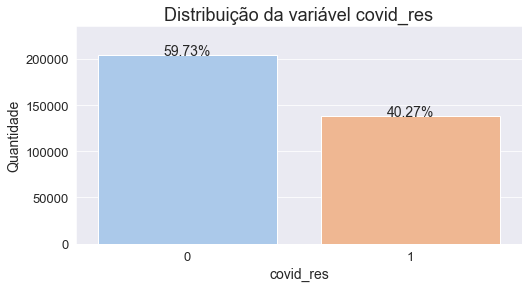

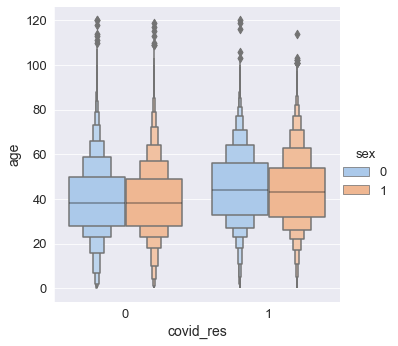

In [28]:
# Analisando a variavel covid_res 

col = 'covid_res'

total = len(dfc)

plt.figure(figsize=(8,4))
g = sns.countplot(x=col, data=dfc, palette=colors)
g.set_title(f"Distribuição da variável {col}")
g.set_xlabel(f"{col}")
g.set_ylabel("Quantidade")
sizes=[]
for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format((height/total)*100),
            ha="center", fontsize=14) 
g.set_ylim(0, max(sizes) * 1.15)
plt.show()

g = sns.catplot(x=col, y="age", hue="sex", kind="boxen", data=dfc, palette=colors)

plt.show()

---

**Conclusões:** 

Analisando a variável covid_res podemos constatar que a quantidade de pacientes positivos e negativos não estão desbalanceados.



---

**Analisando variáveis**



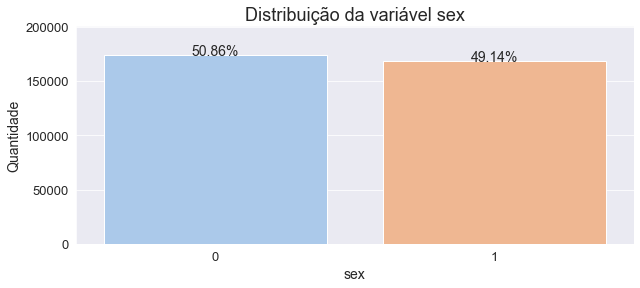

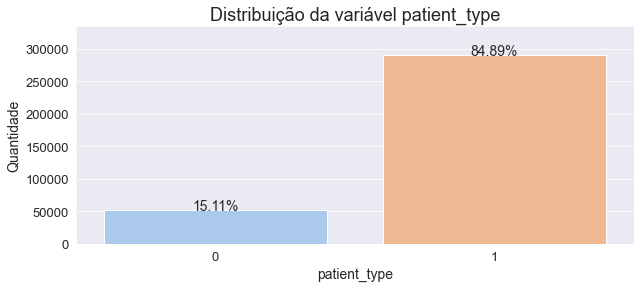

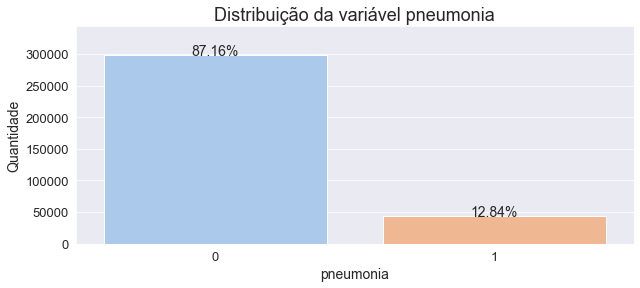

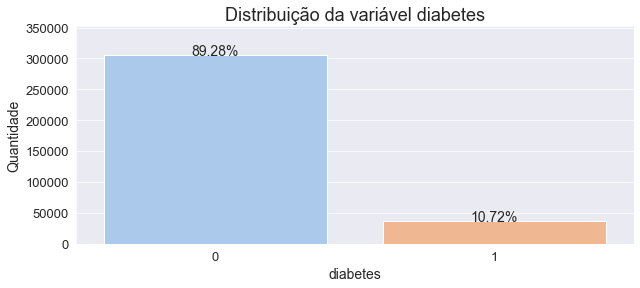

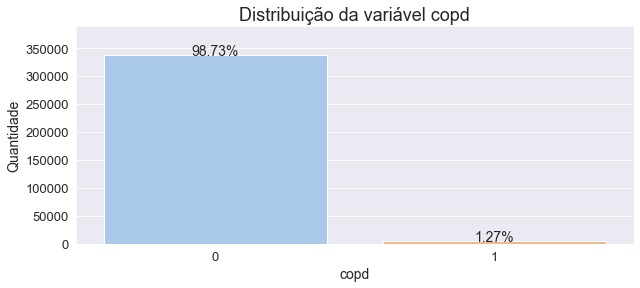

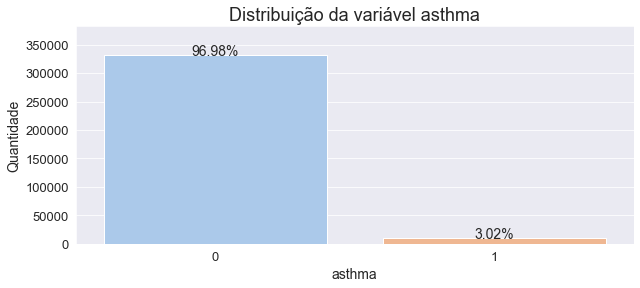

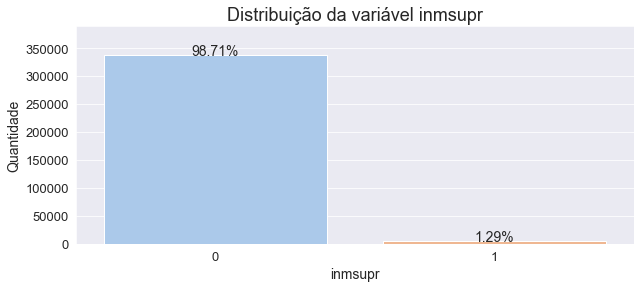

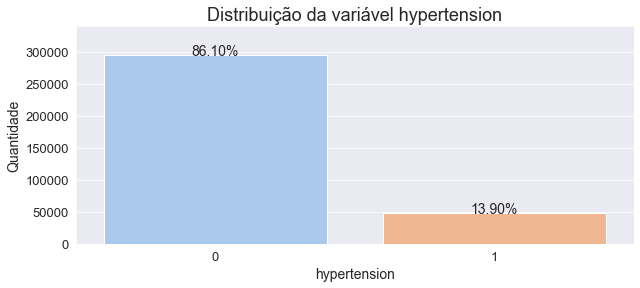

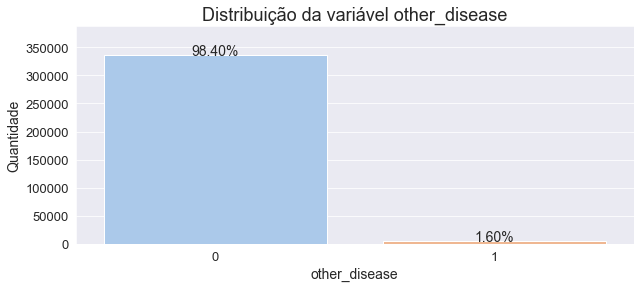

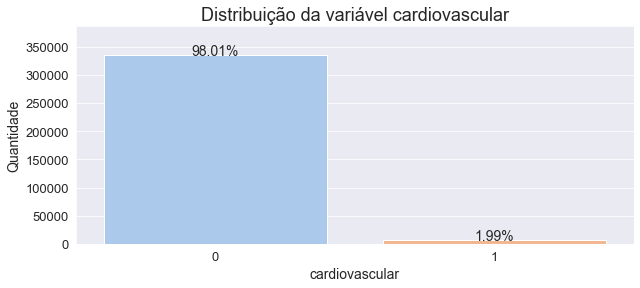

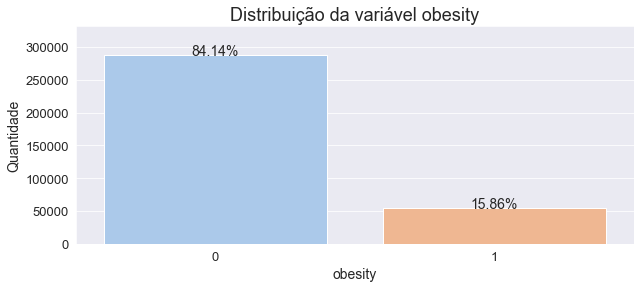

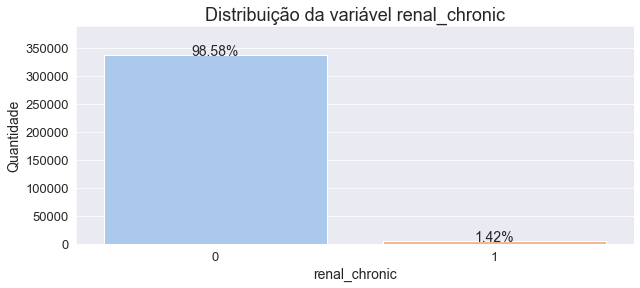

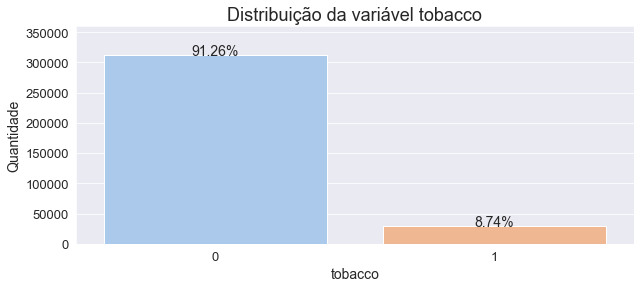

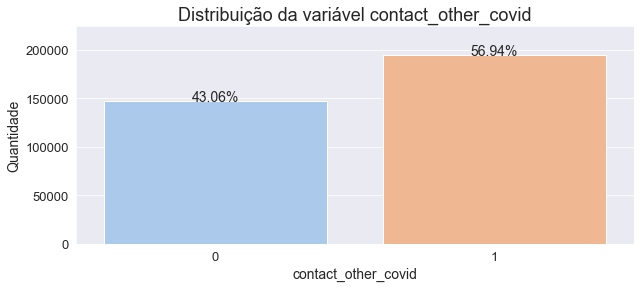

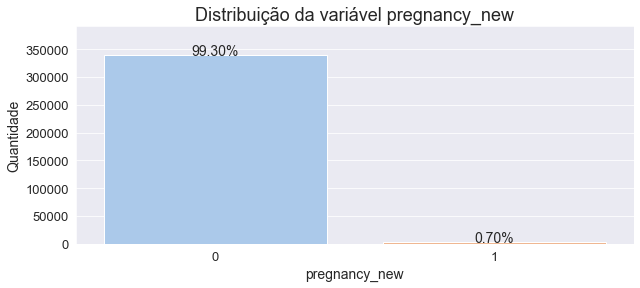

In [29]:
# Analisando os valores das variáveis do datraframe 

#col_filtered = dfc.columns.tolist()
#col_filtered.remove('age')

# itens que serão removidos
unwanted = {'age', 'covid_res'}
col_filtered = [e for e in dfc.columns.tolist() if e not in unwanted]

total = len(dfc)

for col in col_filtered:
    plt.figure(figsize=(10,4))
    g = sns.countplot(x=col, data=dfc, palette=colors)
    g.set_title(f"Distribuição da variável {col}")
    g.set_xlabel(f"{col}")
    g.set_ylabel("Quantidade")

    sizes=[]
        
    for p in g.patches:
        height = p.get_height()
        sizes.append(height)
        g.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format((height/total)*100),
                ha="center", fontsize=14) 

    g.set_ylim(0, max(sizes) * 1.15)

    plt.show()


---

**Conclusões:** 

De modo geral as variáveis estão bem desbalanceadas quando são comparadas unitariamente, que podem definir um grupo de caracteristicas de pacientes.

- **sex**: Sexo do Paciente (0 - Homem / 1 - Mulher)<br>
- **patient_type**: Se o paciente foi dispensado para casa (1) ou se foi internado (0)<br>
intubed: Seo paciente foi intubado ou não
pneumonia: Se o paciente apresentou pneumonia ou não
age: Idade do Paciente
pregnancy: Se a paciente estava grávida ou não (para pacientes mulheres)
diabetes: Se o paciente tem diabetes ou não
copd: Se opaciente tem COPD ou não
asthma: Se o paciente tem Asma ou não
inmsupr: Se o paciente apresentou Imunosupressão ou não
hypertension: Se o paciente tem hipertensão ou não
ohter_disease: Se o paciente tem outras doenças ou não
cardiovascular: Se o paciente tem doenças cardiácas ou não
obesity: Se o paciente tem obesidade ou não
renal_chronic: Se o paciente tem problemas renais ou não
tobacco: Se o paciente é fumante ou não
contact_other_covid: Se o paciente teve contato com outras pessoas diagnosticadas com covid
icu: Se o paciente precisou ser internado na UTI
covid_res: Se o resultado do teste foi Positivo ou Negativo



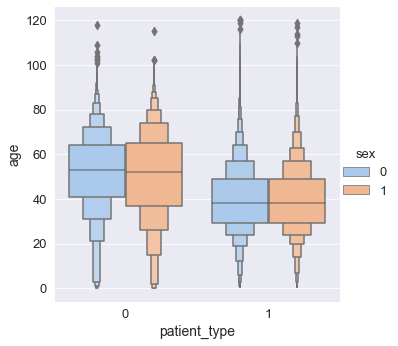

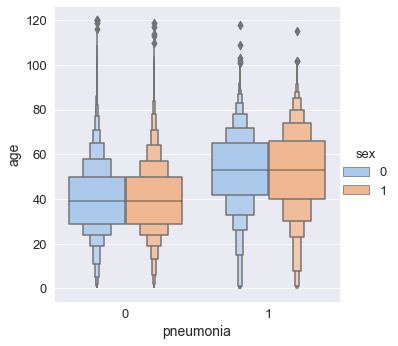

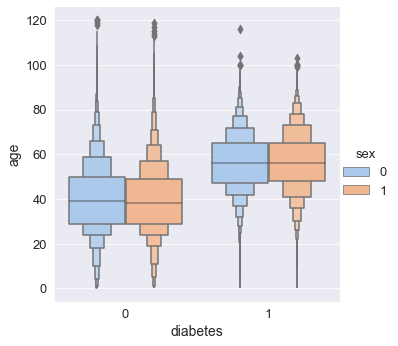

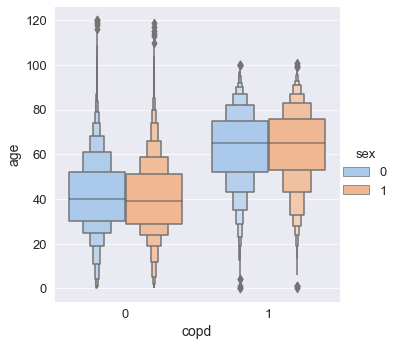

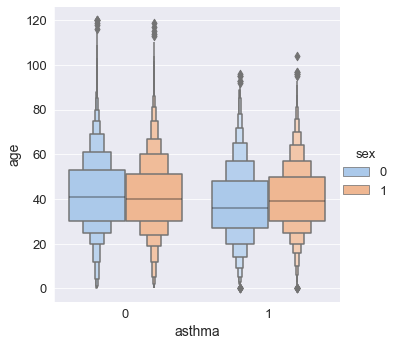

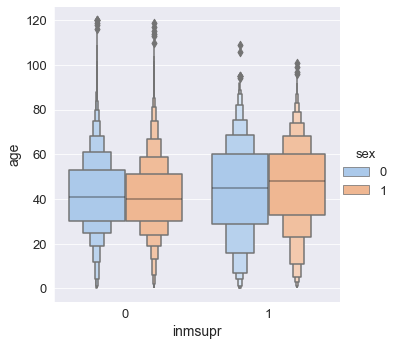

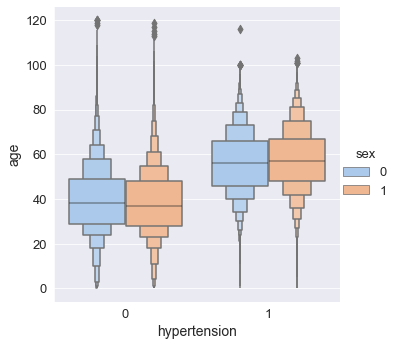

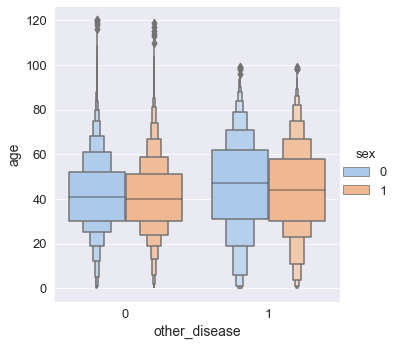

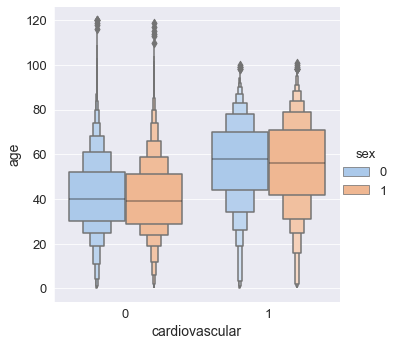

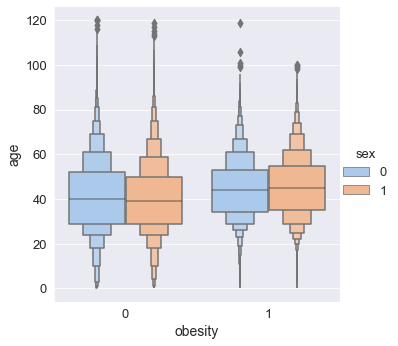

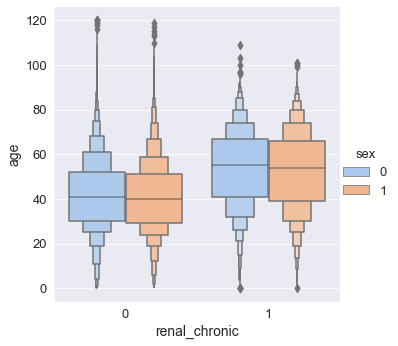

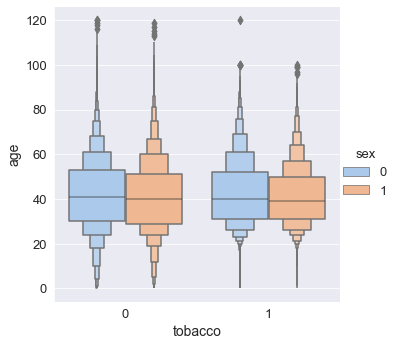

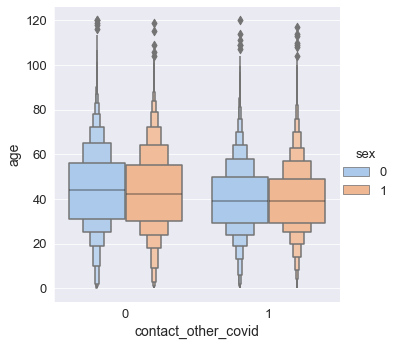

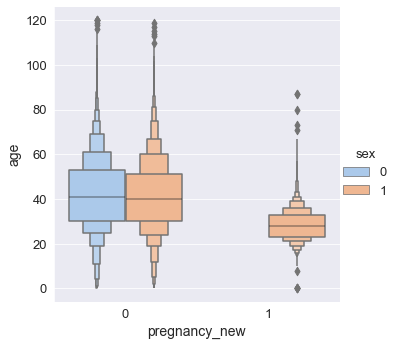

In [30]:
# Analisando os valores das variáveis do datraframe 

# itens que serão removidos
unwanted = {'age', 'sex', 'covid_res'}
col_filtered = [e for e in dfc.columns.tolist() if e not in unwanted]

for col in col_filtered:
    #plt.figure(figsize=(12,6))
    g = sns.catplot(x=col, y="age", hue="sex", kind="boxen", palette=colors, data=dfc)
    #g.set_title(f"Distribuição da variável {col}")
    #g.set_xlabel(f"{col}")
    #g.set_ylabel("Quantidade")

    plt.show()

In [31]:
# Verificando a correlação entre as variáveis com heatmap
#plt.figure(figsize=(30,15))
#sns.heatmap(dfc, annot=True, cmap="YlGnBu")
##plt.savefig("Plotting_Correlation_heatmap.jpg")
#plt.show()

In [32]:
# "Filtrando" o percentual de correlação do dataframe
dfCorr = dfc.corr()
filteredDf = dfCorr[((dfCorr >= .5) | (dfCorr <= -.5)) & (dfCorr !=1.000)]


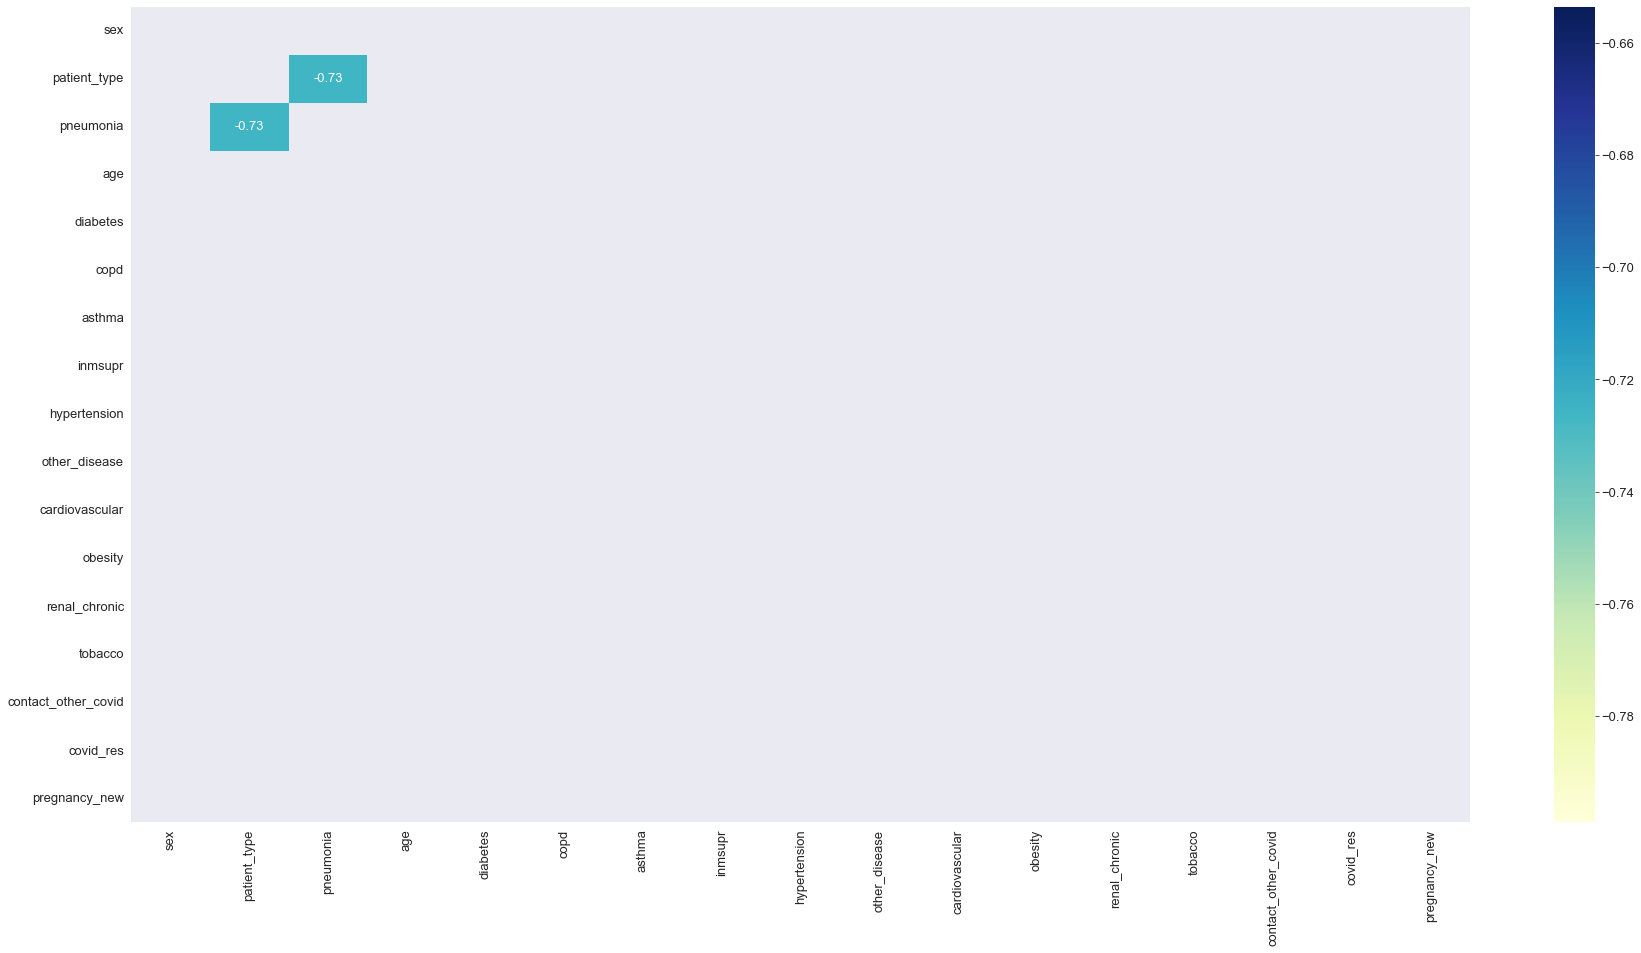

In [33]:
# Verificando a correlação entre as variáveis com heatmap
plt.figure(figsize=(30,15))
sns.heatmap(filteredDf, annot=True, cmap="YlGnBu")
#plt.savefig("Plotting_Correlation_heatmap_w.jpg")
plt.show()

## Modelagem dos Dados

Nesta parte, vamos modelar um classificador para os resultados dos exames de COVID (`covid_res`). Vocês deveram __treinar pelo menos 3 modelos__ (podendo testar mais que 3 também) e de acordo com alguma métrica de avaliação (escolhida por vocês), decidir qual será o melhor modelo a ser utilizado!;


### Separando conjunto de dados Treino e Teste

In [ ]:
# Vamos dividir os nossos dados numa matriz X que contém as características a treinar, 
# e uma matriz y com a variável alvo, neste caso a coluna covid_res. 

X = dfc.drop(['covid_res'], axis = 1)
y = dfc['covid_res']


In [ ]:
# Vamos dividir os dados num conjunto de Train e num conjunto de Test. 
# Iremos treinar o modelo no conjunto de treino e depois utilizaremos o conjunto de testes para avaliar o modelo

random_seed = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_seed, stratify=y)


In [ ]:
# A padronização de um conjunto de dados é um requisito comum a muitos estimadores de aprendizagem de máquinas: 
# podem comportar-se mal se as características individuais não se parecerem mais ou menos com dados distribuídos normalmente.

pipeline = Pipeline([('std_scalar', StandardScaler())])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)


In [ ]:
# Quantidade total da variável "target" (covid_res)

y.value_counts().sort_index()


In [ ]:
# Quantidade separada para o conjunto de treino inicial

y_train.value_counts().sort_index()


In [ ]:
# Quantidade separada para o conjunto de teste inicial

y_test.value_counts().sort_index()#(normalize = True)


### Processando os modelos

**Processando modelos Dummy para métrica inicial**

In [ ]:
# Lista de modelos

list_models = [
{'model_name': 'Dummy Classifier stratified',
 'estimator' : DummyClassifier(strategy='stratified', random_state=random_seed)},
{'model_name': 'Dummy Classifier most_frequent',
 'estimator' : DummyClassifier(strategy='most_frequent', random_state=random_seed)},
{'model_name': 'Dummy Classifier prior',
 'estimator' : DummyClassifier(strategy='prior', random_state=random_seed)},
{'model_name': 'Dummy Classifier uniform',
 'estimator' : DummyClassifier(strategy='uniform', random_state=random_seed)}
]


In [ ]:
# Processando os modelos baseado na list_models

test_models_plot_roc_auc_curve(list_models,
                              "model_name",
                              "estimator",
                              X_train,
                              X_test,
                              y_train,
                              y_test)


**Processando modelos para classificação**

In [ ]:

list_models = [
{'model_name': 'Dummy Classifier uniform',
 'estimator' : DummyClassifier(strategy='uniform', random_state=random_seed)},

#{'model_name': 'Dummy Classifier prior',
# 'estimator' : DummyClassifier(strategy='prior', random_state=random_seed)},
    
{'model_name': 'Decision Tree',
 'estimator' : DecisionTreeClassifier(random_state=random_seed)},
{'model_name': 'Random Forest',
 'estimator' : RandomForestClassifier(random_state=random_seed)}, 
{'model_name': 'AdaBoost',
 'estimator' : AdaBoostClassifier(random_state=random_seed)},
{'model_name': 'GradientBoosting',
 'estimator' : GradientBoostingClassifier(random_state=random_seed)},
{'model_name': 'XGBoost',
 'estimator' : XGBClassifier(random_state=random_seed)},
{'model_name': 'LightGBM',
 'estimator' : LGBMClassifier(random_state=random_seed)},
{'model_name': 'Logistic Regression',
 'estimator' : LogisticRegression(random_state=random_seed)},
{'model_name': 'Naive Bayes Gaussian',
 'estimator' : GaussianNB()},
{'model_name': 'Stochastic Gradient Descent Classifier',
 'estimator' : SGDClassifier(loss='modified_huber',random_state=random_seed)}
#{'model_name': 'Support Vector Machine',
# 'estimator' : SVC(random_state=random_seed)},    
#{'model_name': 'KNN (k-nearest neighbor)',
# 'estimator' : KNeighborsClassifier(n_neighbors=3)},
]


In [ ]:
# 

test_models_plot_roc_auc_curve(list_models,
                              "model_name",
                              "estimator",
                              X_train,
                              X_test,
                              y_train,
                              y_test)



---

**Conclusões:** 

O processo acima retorna informações de cálculos dos modelos de aprendizado de máquina e apresenta um gráfico com as curvas da métrica ROC-AUC.

**ROC - Receiver Operating Characteristic**<br>
A curva ROC mostra o quão bom o modelo criado pode distinguir entre duas coisas (já que é utilizado para classificação). Essas duas coisas podem ser 0 ou 1, ou positivo e negativo. Os melhores modelos conseguem distinguir com precisão o binômio.


**AUC - Area under the (ROC) curve**<br>
O valor do AUC varia de 0,0 até 1,0 e o limiar entre a classe é 0,5, ou seja, acima desse limite, o algoritmo classifica em uma classe e abaixo na outra classe.<br>
AUC, nada mais é que uma maneira de resumir a curva ROC em um único valor, agregando todos os limiares da ROC, calculando a “área sob a curva”.

**The winner is..**
GradientBossting

In [ ]:
# Matriz de confusão

test_models_plot_confusion_matrix(list_models,
                              "model_name",
                              "estimator",
                              X_train,
                              X_test,
                              y_train,
                              y_test)


In [ ]:
# O gráfico acima indica o melhor modelo baseado na pontuação ROC - AUC
model = GradientBoostingClassifier(random_state=random_seed)

# Treinando o modelo com os conjuntos de dados de treinamento equalizados (RandomOverSampler)
model.fit(X_train, y_train)

# Previsão de saída para o conjunto de dados de teste
y_pred = model.predict(X_test)


In [ ]:

#Estudo 2

#xgboost
#.6325
#lightgbm
#.6325

### Técnicas de Balanceamento

#### Aplicando **OverSampling**:

In [ ]:
# Instanciando RandomOverSampler com a estratégia de equilibrar a classe minoritária

oversample = RandomOverSampler(sampling_strategy='minority')


In [ ]:
# Adequando as novas classes para treino

X_train_ov, y_train_ov = oversample.fit_resample(X_train, y_train)


In [ ]:
# Quantidade "original" separada para o conjunto de treino inicial

y_train.value_counts().sort_index()


In [ ]:
# Quantidade "equalizada" com técnica de balanceamento para o conjunto de treino 
# note que a classe minoritária ficou com a mesma quantidade de elementos

y_train_ov.value_counts().sort_index()


In [ ]:
# Treinando o modelo com os conjuntos de dados de treinamento equalizados (RandomOverSampler)

model.fit(X_train_ov, y_train_ov)


In [ ]:
# Previsão de saída para o conjunto de dados de teste

y_pred_ov = model.predict(X_test)


In [ ]:
# Calculando a pontuação 
score=[]

score.append(['f1_score', 'RandomOverSampler', f1_score(y_test, y_pred_ov)])
score.append(['roc_auc_score', 'RandomOverSampler', metrics.roc_auc_score(y_test, y_pred_ov)])


In [ ]:
# Exibindo a pontuação

print("Comparação das Pontuações: ")
score


#### Aplicando o _UnderSampling_:

In [ ]:
# Instanciando RandomUnderSampler com a estratégia de equilibrar a classe majoritária

undersample = RandomUnderSampler(sampling_strategy='majority')


In [ ]:
# Adequando as novas classes para treino

X_train_un, y_train_un = undersample.fit_resample(X_train, y_train)


In [ ]:
# Quantidade "original" separada para o conjunto de treino inicial

y_train.value_counts().sort_index()


In [ ]:
# Quantidade "equalizada" com técnica de balanceamento para o conjunto de treino 
# note que a classe majoritária ficou com a mesma quantidade de elementos

y_train_un.value_counts().sort_index()


In [ ]:
# Treinando o modelo com os conjuntos de dados de treinamento equalizados (RandomUnderSampler)

model.fit(X_train_un, y_train_un)


In [ ]:
# Previsão de saída para o conjunto de dados de teste

y_pred_un = model.predict(X_test)


In [ ]:
# Calculando a pontuação 

score.append(['f1_score', 'RandomUnderSampler', f1_score(y_test, y_pred_un)])
score.append(['roc_auc_score', 'RandomUnderSampler', metrics.roc_auc_score(y_test, y_pred_un)])


In [ ]:
# Exibindo a pontuação

print("Comparação das Pontuações: ")
score


#### Aplicando o SMOTE

In [ ]:
# Instanciando SMOTE

smote = SMOTE()


In [ ]:
# Adequando as novas classes para treino

X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)


In [ ]:
# Quantidade "original" separada para o conjunto de treino inicial

y_train.value_counts()


In [ ]:
# Quantidade "equalizada" com técnica de balanceamento para o conjunto de treino 
# note que a classe majoritária ficou com a mesma quantidade de elementos

y_train_sm.value_counts()


In [ ]:
# Treinando o modelo com os conjuntos de dados de treinamento equalizados (SMOTE)

model.fit(X_train_sm, y_train_sm)


In [ ]:
# Previsão de saída para o conjunto de dados de teste

y_pred_sm = model.predict(X_test)


In [ ]:
# Calculando a pontuação 

score.append(['f1_score', 'SMOTE', f1_score(y_test, y_pred_sm)])
score.append(['roc_auc_score', 'SMOTE', metrics.roc_auc_score(y_test, y_pred_sm)])


In [ ]:
# Exibindo a pontuação

print("Comparação das Pontuações: ")
score


#### Análise 

In [ ]:
# Conmparação das pontuações após técnicas de balanceamento
# Ordenando a pontuação
score.sort(key = lambda y:y[2],reverse =True)

# Exibindo a pontuação
print("Comparação das Pontuações: ")
score


In [ ]:
# Utilizando o Cross Validation

print(cross_val_score(model, X_train, y_train, scoring='accuracy', cv=5))


In [ ]:
# Utilizando o StratifiedKFold

kf = StratifiedKFold(n_splits=5)
kf.get_n_splits(X_train)


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

list_accuracy = []
list_precision = []
list_recall = []
list_f1_score = []

i = 1
for train_index, val_index in kf.split(X_train, y_train):
    print("============================================================================================")
    print("Fold ", i)
    print("TRAIN:", train_index, "VALIDATION:", val_index)
    KFold_X_train, KFold_X_val = X_train[train_index], X_train[val_index]
    KFold_y_train, KFold_y_val = y_train[train_index], y_train[val_index]
    model.fit(KFold_X_train, KFold_y_train)
    y_pred = model.predict(KFold_X_val)
    #Calcula as métricas
    acc = accuracy_score(KFold_y_val, y_pred)
    prec = precision_score(KFold_y_val, y_pred)
    recall = recall_score(KFold_y_val, y_pred)
    f1 = f1_score(KFold_y_val, y_pred)
    print("Accuracy: ", acc)
    print("Precison: ", prec)
    print("Recal:    ", recall)
    print("F1-Score: ", f1)
    # salva na lista
    list_accuracy.append(acc)
    list_precision.append(prec)
    list_recall.append(recall)
    list_f1_score.append(f1)
    i += 1
print("============================================================================================")

## Otimização do Modelo 

A partir do modelo escolhido no tópico anterior, vamos tentar aprimorar e garantir um melhor desempenho no modelo, seja fazendo validação cruzada, otimização de parâmetros com _GridSearchCV_ ou _RandomizedSearchCV_ e até mesmo testar diferentes _thresholds_ (ao invés de utilizar a função _predict_ do modelo, utilize a função _predict_proba_ do modelo e a partir das probabilidades determinar qual vai ser o limiar onde será considerado um caso positivo ou negativo);


In [ ]:
# Definições do modelo 
pprint(model)

# Parâmetros do modelo
print("")
pprint(model.get_params())


Vamos entender o significado dos parâmetros que vamos mexer:

**n_estimators** : São o número de árvores utilizada na floresta aleatória;<br>
**criterion** : O critério de cálculo para a separação dos nós;<br>
**max_depth** : Profundidade máxima da árvore;<br>
**min_samples_split** : Quantidade mínima de dados em um nó antes da separação nas folhas;<br>
**min_samples_split** : Quantidade mínima de dados em uma folha após a separação.<br>

Para efetuarmos a otimização dos modelos vamos definir os __parâmetros__ que vamos variar e para quais valores vamos testar:

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 5)]

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 100, num = 5)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Create the random grid
params_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

pprint(params_grid)

Aplicando **GridSearchCV**:

In [ ]:
# Instanciando GridSearchCV com a variação dos parametros 

grid_search = GridSearchCV(estimator = model, 
                           param_grid = params_grid, 
                           scoring='accuracy', 
                           cv = 3, 
                           verbose = 2,
                           n_jobs = -1)

In [ ]:
%%time
# Adequando as novas classes para treino

grid_search.fit(X_train, y_train)

In [ ]:

print(grid_search.cv_results_['mean_test_score'].mean())
   

In [ ]:
# apresentação dos melhores parametros

grid_search.best_params_


In [ ]:
# Instanciando GradientBoostingClassifier com os melhores parametros

model_gs = GradientBoostingClassifier(max_depth = 10,
                                  min_samples_leaf = 1,
                                  min_samples_split = 2,
                                  n_estimators = 200,
                                  random_state = 42)

In [ ]:
# Adequando as novas classes para treino

model_gs.fit(X_train, y_train)


In [ ]:
# Previsão de saída para o conjunto de dados de teste

y_pred_gs = model_gs.predict(X_test)


In [ ]:
print(accuracy_score(y_test, y_pred_gs))

In [ ]:
acc_grid = accuracy_score(y_test, y_pred_gs)

Aplicando **RandomizedSearchCV**:

In [ ]:
# Instanciando RandomizedSearchCV com a variação dos parametros 

random_search = RandomizedSearchCV(estimator = model, 
                                   param_distributions = params_grid, 
                                   n_iter = 100, 
                                   cv = 3, 
                                   verbose=2,
                                   n_jobs = -1)


In [ ]:
%%time

# Adequando as novas classes para treino

random_search.fit(X_train, y_train)


In [ ]:

print(random_search.cv_results_['mean_test_score'].mean())


In [ ]:
# apresentação dos melhores parametros

random_search.best_params_


In [ ]:

model_rs = RandomForestClassifier(max_depth = 100,
                                  min_samples_leaf = 2,
                                  min_samples_split = 2,
                                  n_estimators = 650,
                                  random_state = 42)

In [ ]:
model_rs.fit(X_train, y_train)

In [ ]:
y_pred_rs = model_rs.predict(X_test)

In [ ]:
print(accuracy_score(y_test, y_pred_rs))

In [ ]:
acc_random = accuracy_score(y_test, y_pred_rs)

In [ ]:
print("Comparação das Acurácias: ")
print('Acurácia sem Otimização:         ', np.round(acc, 3))
print('Acurácia com GridSearchCV:       ', np.round(acc_grid, 3))
print('Acurácia com RandomizedSearchCV: ', np.round(acc_random, 3))

## Conclusões sobre o Projeto

Para finalizar, descreva as suas conclusões sobre o desenvolvimento do modelo e os resultados obtidos.


---

**Conclusões:** 

Criamos um novo dataframe denominado dfc, retiramos as variáveis que definimos não ser relevantes para o modelo e excluimos todos os registros com valores faltantes, pois identificamos anteriormente que o percentual de valores faltantes eram mínimos.


Conforme apresentado no quadro acima de comparações de dataframes.

fit () : Treina o modelo para um determinado número de épocas (isto é para o tempo de treinamento, com o conjunto de dados de treinamento).

predict () : gera previsões de saída para as amostras de entrada (isso é para algum lugar entre o tempo de treinamento e teste).

evaluate () : Retorna o valor da perda e os valores das métricas para o modelo no modo de teste (isso é para o tempo de teste, com o conjunto de dados de teste).
    
    
    
fit() é para treinar o modelo com as entradas dadas.

predict() é para a previsão real. Ele gera previsões de saída para as amostras de entrada.

evaluate() é para avaliar o modelo já treinado. Retorna o valor da perda e os valores das métricas para o modelo.

Vamos considerar um exemplo de regressão simples:    

In [ ]:
# O objetivo do modelo é prever os casos confirmados de COVID a partir do diagnóstico de sintomas e informações dos pacientes.

# Para melhorar o dataframe optamos em retirar os pacientes sem informação de declarada de pregnancy
dfc.dropna(subset = ["pregnancy_new"], inplace=True)

print (f'pregnancy - Percentual de valores NaN: {100 * dfc["pregnancy_new"].isnull().sum() / len(dfc):.2f}')

In [ ]:
Com a alteração 
deixar a base consistente

In [ ]:
# Verificando se o dataframe esta balanceado, onde o resultado do teste foi Positivo ou Negativo (1 / 0)

df['covid_res'].value_counts()


In [ ]:
for col in df.columns:
    print(f"{col}")

In [ ]:

    col = 'covid_res'

    total = len(df)
    plt.figure(figsize=(8,7))

    g = sns.countplot(x=col, data=df, palette=colors)
    g.set_title(f"Distribuição da variável {col}")
    g.set_xlabel(f"{col}")
    g.set_ylabel("Quantidade")

    sizes=[]

    for p in g.patches:
        height = p.get_height()
        sizes.append(height)
        g.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format((height/total)*100),
                ha="center", fontsize=14) 

    g.set_ylim(0, max(sizes) * 1.15)

    plt.show()

In [ ]:


counter = 1
ct_ax = 0

for col in df.columns:
    if ct_ax == 0:
        ax1 = plt.subplot(12, 2, counter)        
        sns.countplot(x=col, data=df, palette=colors, ax = ax1)
        ax1.set_title(f"Distribuição da variável {col}")
        ax1.set_xlabel(f"{col}")
        ax1.set_ylabel("Quantidade")
        sns.boxplot(data = df, x = col, ax = ax1)
        counter += 1
        ct_ax = 1

        sizes=[]

        for p in ax1.patches:
            height = p.get_height()
            sizes.append(height)
            ax1.text(p.get_x()+p.get_width()/2.,
                    height + 3,
                    '{:1.2f}%'.format((height/total)*100),
                    ha="center", fontsize=14) 
        
    if ct_aux == 1:
        ax2 = plt.subplot(12, 2, counter)        
        sns.countplot(x=col, data=df, palette=colors, ax = ax2)
        ax2.set_title(f"Distribuição da variável {col}")
        ax2.set_xlabel(f"{col}")
        ax2.set_ylabel("Quantidade")
        sns.boxplot(data = df, x = col, ax = ax2)
        counter += 1
        ct_ax = 0

        sizes=[]

        for p in ax2.patches:
            height = p.get_height()
            sizes.append(height)
            ax2.text(p.get_x()+p.get_width()/2.,
                    height + 3,
                    '{:1.2f}%'.format((height/total)*100),
                    ha="center", fontsize=14) 
        
plt.show()




In [ ]:
total = len(df)
plt.figure(figsize=(8,7))

g = sns.countplot(x='covid_res', data=df, palette=colors)
g.set_title("Distribuição da variável de testes de Covid")
g.set_xlabel("Testes")
g.set_ylabel("Quantidade")

sizes=[]

for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format((height/total)*100),
            ha="center", fontsize=14) 
    
g.set_ylim(0, max(sizes) * 1.15)

plt.show()

In [ ]:
df.corr().style.background_gradient(cmap='YlGnBu')

In [ ]:
dfc.describe().T

In [ ]:
sns.catplot(x="sex", kind="count", palette=colors, data=dfc)
plt.show()

In [ ]:
sns.catplot(x="sex", y="age", kind="boxen", palette=colors, data=dfc.sort_values("age"))
plt.show()

In [ ]:
dfc.corr().style.background_gradient(cmap='YlGnBu')

### Auto EDA

#### Análise exploratória de dados usando D-tale

In [ ]:
# Instalação da biblioteca
#!pip install dtale

# Site oficial
# https://pypi.org/project/dtale/

In [ ]:
import dtale 

#df = pd.read_csv('./COVID.csv')
d = dtale.show (dfc) 
d.open_browser() #Aguarde até a página do d-tale

#### Análise exploratória de Dados usando Pandas Profiling

In [ ]:
# Instalação da biblioteca
#!pip install pandas-profiling

# Site oficial
# https://pypi.org/project/pandas-profiling/

In [ ]:
#importing pacotes necessários
import pandas_profiling

#importing the data
df = pd.read_csv('./COVID.csv')

#estatísticas descritivas
pandas_profiling.ProfileReport (df) # Aguarde o tpemino do processamento, pode ser demorado devido ao tamanho do dataframe

#### Análise exploratória de Dados usando Sweetviz

In [ ]:
# Instalação da biblioteca
#!pip install sweetviz

# Site oficial
# https://pypi.org/project/sweetviz/

In [ ]:
import sweetviz

df = pd.read_csv('./COVID.csv')
my_report = sweetviz.analyze ([df, 'Train'], target_feat = 'covid_res')
my_report.show_html ('FinalReport.html')

#### Análise exploratória de Dados usando Autoviz

In [ ]:
# Instalação da biblioteca
#!pip install autoviz

# Site oficial
# https://pypi.org/project/autoviz/

In [ ]:
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class ()
df = AV.AutoViz ('./COVID.csv')

### Machine learning

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

In [ ]:
random_seed = 42

list_models = [
{'model_name': 'Decision Tree',
 'estimator' : DecisionTreeClassifier(random_state = random_seed)},
{'model_name': 'Random Forest',
 'estimator' : RandomForestClassifier(random_state = random_seed)}, 
{'model_name': 'AdaBoost',
 'estimator' : AdaBoostClassifier(random_state = random_seed)},
{'model_name': 'GradientBoosting',
 'estimator' : GradientBoostingClassifier(random_state = random_seed)},
{'model_name': 'XGBoost',
 'estimator' : XGBClassifier(random_state = random_seed)},
{'model_name': 'LightGBM',
 'estimator' : lgb.LGBMClassifier(random_state = random_seed)}
]

In [ ]:
test_models_plot_roc_auc_curve(list_models,
                              "model_name",
                              "estimator",
                              X_train,
                              X_test,
                              y_train,
                              y_test)

### AutoML (Automate model)

In [ ]:
import sklearn.model_selection
import sklearn.datasets
import sklearn.metrics

import autosklearn.regression

def main():
X, y = sklearn.datasets.load_boston(return_X_y=True)
feature_types = (['numerical'] * 3) + ['categorical'] + (['numerical'] * 9)
X_train, X_test, y_train, y_test = \
sklearn.model_selection.train_test_split(X, y, random_state=1)

automl = autosklearn.regression.AutoSklearnRegressor(
time_left_for_this_task=120,
per_run_time_limit=30,
tmp_folder='/tmp/autosklearn_regression_example_tmp',
output_folder='/tmp/autosklearn_regression_example_out',
)
automl.fit(X_train, y_train, dataset_name='boston',
feat_type=feature_types)

print(automl.show_models())
predictions = automl.predict(X_test)
print("R2 score:", sklearn.metrics.r2_score(y_test, predictions))


if __name__ == '__main__':
main()

In [ ]:
# Import libraries
!pip install autokeras

# Site oficial
#https://pypi.org/project/autokeras/

In [ ]:
!pip install tensorflow --user

In [ ]:
import TensorFlow as tf
from tensorflow.keras.datasets import mnist
import autokeras as ak

In [ ]:
# Load the data 
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)  # (60000, 28, 28)
print(y_train.shape)  # (60000,)
print(y_train[:3])  # array([7, 2, 1], dtype=uint8)

In [ ]:
# Initialize the image classifier
clf = ak.ImageClassifier(overwrite=True, max_trials=1)
# Input the training data
clf.fit(x_train, y_train, epochs=10)
# Make prediction with the best model on the test dataset
predicted_y = clf.predict(x_test)
print(predicted_y)
# Evaluate the model on the test dataset
print(clf.evaluate(x_test, y_test))

In [ ]:
# With 85% training dataset and 15% validation dataset 
clf.fit(x_train, y_train,validation_split=0.15,epochs=10)

In [ ]:
# Initialize AutoKeras input and output nodes
input_node = ak.ImageInput()
output_node = ak.ImageBlock()
# Your neural network options, here we try Resnet
block_type="resnet",
# You can Normalize the dataset
normalize=True,
# You can add data augmentation
augment=False)(input_node)
# Build your output layer with the numbers of classes (in this example, 10 numbers 0-9)
output_node = ak.ClassificationHead()(output_node)
# Compile the input and output layers 
clf = ak.AutoModel(inputs=input_node, outputs=output_node, overwrite=True, max_trials=1)
# Train the model on the training dataset
clf.fit(x_train, y_train, epochs=10)

In [ ]:
# Build your tensors from the train and test datasets 
train_set = tf.data.Dataset.from_tensor_slices(((x_train,), (y_train,)))
test_set = tf.data.Dataset.from_tensor_slices(((x_test,), (y_test,)))
# Create your autokeras image classifier 
clf = ak.ImageClassifier(overwrite=True, max_trials=1)
# Train the model on the training dataset
clf.fit(train_set, epochs=1)
# Predict with the model with the test dataset
predicted_y = clf.predict(test_set)
# Evaluate the model with the test dataset 
print(clf.evaluate(test_set))

In [ ]:
# Verificando a correlação entre as variáveis usando o parplot do Seaborn. 
#sns.pairplot(dfc)
#plt.savefig("Plotting_Correlation_pairplot.jpg")
#plt.show()

In [ ]:
# Verificando a correlação entre as variáveis usando o PairGrid do Seaborn
#g = sns.PairGrid(df)
#g.map_upper(sns.histplot)
#g.map_lower(sns.kdeplot, fill=True)
#g.map_diag(sns.histplot, kde=True)
#plt.savefig("Plotting_Correlation_PairGrid.jpg")
#plt.show()

In [ ]:
# "Filtrando" o percentual de correlação do dataframe
#dfCorr = dfc.corr()
#filteredDf = dfCorr[((dfCorr >= .5) | (dfCorr <= -.5)) & (dfCorr !=1.000)]

In [ ]:
# Verificando a correlação entre as variáveis com heatmap
#plt.figure(figsize=(30,15))
#sns.heatmap(filteredDf, annot=True, cmap="YlGnBu")
#plt.savefig("Plotting_Correlation_heatmap.jpg")
#plt.show()

In [ ]:
# analisando os dados por boxplot e histograma
var = dfc.columns
plt.figure(figsize=(15,60))

counter = 1

for v in var:
    ax1 = plt.subplot(12, 2, counter)
    ax1.set_title(v)
    sns.boxplot(data = dfc, x = v, color="#f51d3e", ax = ax1)
    counter += 1
    ax2 = plt.subplot(12, 2, counter)
    ax2.set_title(v)
    sns.histplot(data = dfc, x = v, kde = True, color="#f51d3e", ax=ax2)
    counter += 1
    
plt.show()

In [ ]:
# Cria novo dataframe
# Seleciona todas as linhas duplicadas no dataframe baseado em todas as colunas
df_r_duplicateRows = df[df.duplicated(keep=False)].copy()
print("Todas as linhas duplicadas:")
print(df_r_duplicateRows.shape)

df[df.duplicated(keep=False)].shape()

# Excluindo os linhas duplicadas
df_r_clean = df_r.drop_duplicates(keep='first').copy()
df_r_clean.shape


In [ ]:
df['pregnancy_new'].unique()

In [ ]:
# pregnancy 
# Os valores nulos (NaN), foram atualizados para 0, onde a variável sex é igual a 0 (Sexo do Paciente 0 - Homem / 1 - Mulher)
    
# Method using np.where
df['pregnancy_new'] = np.where(df['sex'] == 0, 0, df['pregnancy'])

# ============== ALTERNATIVE METHODS ==============
## Method using np.select
# df['pregnancy_new'] = np.select([df['pregnancy']==0], [0], default=df['pregnancy'])

## Method applying lambda function with if
# df['pregnancy_new'] = df[['pregnancy_new', 'pregnancy']].apply(lambda x: x[0] if x[1]==0 else x[0], axis=1)

## Method A using loc
# df.loc[df['pregnancy']!=0, 'pregnancy_new'] = df['pregnancy']
# df.loc[df['pregnancy']==0, 'pregnancy_new'] = 0

## Method B using loc (works as long as df['radius'] has no missing data)
# df['pregnancy_new'] = df['pregnancy']
# df.loc[df['pregnancy']==0, 'pregnancy_new'] = 0

# Inspect results
df

In [ ]:
# analisando informações básicas do dataframe
df.info()

In [ ]:
(392268 / 499692) * 100

In [ ]:
( 11 / qtl ) * 100

In [ ]:
df.count()

In [ ]:
(df.isnull().sum() / qtl) * 100

In [ ]:
df.count()

In [ ]:
df.info()

In [ ]:
df_tratado = df.drop('Unnamed: 0', axis='columns').copy()

In [ ]:
df_tratado

In [ ]:
# Function for evaluating NaN values in dataframe

def missing_zero_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
        mz_table.to_excel('missing_and_zero_values.xlsx', freeze_panes=(1,0), index = True)
        return mz_table

missing_zero_values_table(df)